In [2]:
import os
import requests
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
#Capturas desde el 2010 al 2015
a=pd.read_csv("../../Datos/Regresion/CAPTURAS_202010-2015.csv", skiprows=[0,1,2,3,4,5,6,7,8,9],parse_dates = [2], dayfirst = True )
a=a[a.index<839793]
a["CANTIDAD"]=pd.to_numeric(a["CANTIDAD"])

In [5]:
#Capturas desde el 2016 al 2020 en junio
b=pd.read_csv("../../Datos/Regresion/CAPTURAS_202016-2020.csv",skiprows=[0,1,2,3,4,5,6,7,8,9],parse_dates = [2], dayfirst = True)
b=b[b.index<616295]
b["CANTIDAD"]=pd.to_numeric(b["CANTIDAD"])

In [6]:
#Arreglos a datos
b.columns=a.columns
frames=[a,b]
result = pd.concat(frames)
result["CANTIDAD"]=pd.to_numeric(result["CANTIDAD"])

In [7]:
#Columnas importantes Fecha de hecho y Municipio
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456088 entries, 0 to 616294
Data columns (total 8 columns):
 #   Column                        Non-Null Count    Dtype         
---  ------                        --------------    -----         
 0   DEPARTAMENTO                  1456067 non-null  object        
 1   MUNICIPIO                     1456054 non-null  object        
 2   FECHA HECHO                   1456088 non-null  datetime64[ns]
 3   GENERO                        1456088 non-null  object        
 4   DESCRIPCION CONDUCTA CAPTURA  1456088 non-null  object        
 5   AGRUPA EDAD PERSONA           1456088 non-null  object        
 6   CODIGO DANE                   1456054 non-null  float64       
 7   CANTIDAD                      1456088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 100.0+ MB


In [10]:
#Pero conozcamos un poco los datos

In [11]:
#¿Cuantos capturados hay  por genero y Edad?
ListaTodo=result.groupby(['GENERO','AGRUPA EDAD PERSONA'])["CANTIDAD"].sum()
ListaTodo

GENERO     AGRUPA EDAD PERSONA
FEMENINO   ADOLESCENTES             23991
           ADULTOS                 249214
           MENORES                     66
MASCULINO  ADOLESCENTES            203365
           ADULTOS                2097952
           MENORES                    279
Name: CANTIDAD, dtype: int64

In [13]:
#¿Cuantos capturados hay  por Municipio?
ListaMunicipios=result.groupby(['MUNICIPIO'])["CANTIDAD"].sum()
ListaMunicipios


MUNICIPIO
ABEJORRAL         899
ABREGO            740
ABRIAQUÍ           41
ACACÍAS          3621
ACANDÍ            515
                 ... 
ZETAQUIRA         127
ZIPACÓN           215
ZIPAQUIRÁ        6937
ZONA BANANERA    1911
ÚTICA             109
Name: CANTIDAD, Length: 1022, dtype: int64

In [14]:
#Y en Guacari ¿Cuantos?
ListaMunicipios["GUACARÍ"]

1362

In [16]:
#¿Cuales son los incidentes en especifico?
resultGuacari=result[result["MUNICIPIO"]=="GUACARÍ"]

In [17]:
resultGuacari

,DEPARTAMENTO,MUNICIPIO,FECHA HECHO,GENERO,DESCRIPCION CONDUCTA CAPTURA,AGRUPA EDAD PERSONA,CODIGO DANE,CANTIDAD
375786,VALLE,GUACARÍ,2010-01-09,MASCULINO,ARTÍCULO 111. LESIONES PERSONALES,ADULTOS,76318000.0,1
375787,VALLE,GUACARÍ,2010-01-12,MASCULINO,ARTÍCULO 239. HURTO RESIDENCIAS,ADULTOS,76318000.0,1
375788,VALLE,GUACARÍ,2010-01-17,MASCULINO,"ARTÍCULO 376. TRÁFICO, FABRICACIÓN O PORTE DE ...",ADOLESCENTES,76318000.0,1
375789,VALLE,GUACARÍ,2010-01-22,FEMENINO,"ARTÍCULO 376. TRÁFICO, FABRICACIÓN O PORTE DE ...",ADULTOS,76318000.0,2
375790,VALLE,GUACARÍ,2010-01-22,MASCULINO,"ARTÍCULO 376. TRÁFICO, FABRICACIÓN O PORTE DE ...",ADOLESCENTES,76318000.0,3
...,...,...,...,...,...,...,...,...
613350,VALLE,GUACARÍ,2020-06-18,MASCULINO,ARTÍCULO 229. VIOLENCIA INTRAFAMILIAR,ADULTOS,76318000.0,1
614286,VALLE,GUACARÍ,2020-06-22,MASCULINO,ARTÍCULO 448. FUGA DE PRESOS,ADULTOS,76318000.0,1
614552,VALLE,GUACARÍ,2020-06-23,MASCULINO,"ARTÍCULO 365. FABRICACIÓN, TRÁFICO, PORTE O TE...",ADULTOS,76318000.0,1
615385,VALLE,GUACARÍ,2020-06-26,MASCULINO,"ARTÍCULO 376. TRÁFICO, FABRICACIÓN O PORTE DE ...",ADULTOS,76318000.0,1


In [18]:
resultGuacari.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119 entries, 375786 to 615858
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DEPARTAMENTO                  1119 non-null   object        
 1   MUNICIPIO                     1119 non-null   object        
 2   FECHA HECHO                   1119 non-null   datetime64[ns]
 3   GENERO                        1119 non-null   object        
 4   DESCRIPCION CONDUCTA CAPTURA  1119 non-null   object        
 5   AGRUPA EDAD PERSONA           1119 non-null   object        
 6   CODIGO DANE                   1119 non-null   float64       
 7   CANTIDAD                      1119 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 78.7+ KB


In [19]:
# Y en Guacari ¿Cuantos capturados hay  por genero y Edad?
ListaGen=resultGuacari.groupby(['GENERO','AGRUPA EDAD PERSONA'])["CANTIDAD"].sum()
ListaGen

GENERO     AGRUPA EDAD PERSONA
FEMENINO   ADOLESCENTES             10
           ADULTOS                 100
MASCULINO  ADOLESCENTES            242
           ADULTOS                1009
           MENORES                   1
Name: CANTIDAD, dtype: int64

Hay 1362 individuos en total y eso es lo que teniamos por ListaMunicipios["GUACARÍ"]

# Regresion

La regresion la usaremos aqui para intentar saber ¿Cuantos capturados por semana espero?

In [20]:
#Primero estos son formatos Fechas, ya estaba en datetime pero no esta de mas volverlo a convertir.
resultGuacari["DIA"]=pd.to_datetime(resultGuacari["FECHA HECHO"]) 
#Una nueva columna DIAIni, alli pongo la fecha del primer dia En este caso es el primero de enero del 2010
#pero si fuera un analisis semanal Seria el lunes de esa semana 28 de diciembre del 2009

resultGuacari["DIAIni"]=datetime.date(2010, 1, 1)
resultGuacari["DIAIni"]=pd.to_datetime(resultGuacari["DIAIni"])
# Solo resta buscar la diferencia entre DIAIni y la FECHA HECHO, Ademas la convertire en meses de diferencia
resultGuacari["Mes"]=resultGuacari["DIA"]-resultGuacari["DIAIni"]
resultGuacari["Mes"]=resultGuacari["Mes"]//np.timedelta64(1,'M')

In [22]:
#La regresion que planteo es a medida que pasan los meses desde el inicio hay mas capturados, pero antes debo saber
#los capturados por mes
DataReg=resultGuacari.groupby(['Mes'])["CANTIDAD"].sum()
Acumulado=DataReg.cumsum()

In [23]:
X = Acumulado.index.to_frame("DF")
Y = Acumulado
Reg=pd.concat([X, Y], axis=1)

In [24]:
Reg

,Mes,CANTIDAD
Mes,,
0,0,11
1,1,17
2,2,22
3,3,29
4,4,41
...,...,...
121,121,1296
122,122,1314
123,123,1325


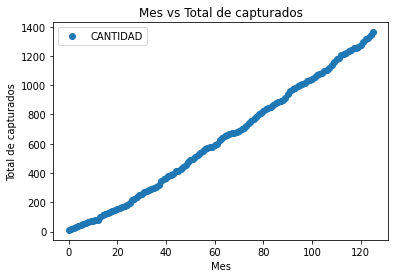

In [25]:
#El comportamiento de las capturas acumuladas
Reg.plot(x='Mes', y='CANTIDAD', style='o') 
plt.title('Mes vs Total de capturados') 
plt.xlabel('Mes') 
plt.ylabel('Total de capturados') 
plt.show()

In [26]:
from sklearn.linear_model import LinearRegression
# Se cargan unos datos para entrenar el modelo
X = Reg['Mes'].values.reshape(-1,1)
Y = Reg['CANTIDAD'].values.reshape(-1,1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# Regresor lineal
modelo = LinearRegression(fit_intercept=False)# Le puse cero por que iniciamos con cero capurados
# Se entrena el modelo con los datos
modelo.fit(X_train, Y_train)#Uso todos los datos Pero se podrian usar un porcentaje y despues evaluar con el restante

# Una vez ha sido entrenado, se puede calcular el resultado
# para una nueva entrada
Y_pred = modelo.predict(X_test)

In [27]:
#Para obtener el intercepto:
print(modelo.intercept_)
#Para obtener la pendiente
print(modelo.coef_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(Y_test, Y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(Y_test, Y_pred))

0.0
[[10.36676118]]
Mean squared error: 1091.93
Variance score: 0.99


Primero el coeficiete es el multiplicador de la X y nos diria cuanto crece por unidad de medida del otro. En nustro caso
Hay 10,35 capturados por mes.
Enonces por que no ver que meses tienen Mayores y menores cantidad de capturados.

In [28]:
A=DataReg-10.35

In [29]:
B=A.sort_values(ascending=False)[:10]

In [30]:
B.index.values

array([ 90,  62,  49, 110, 121,  74,  91,  13,  38,  37])

In [31]:
dftot = pd.DataFrame({'A' : []})
for i in B.index.values:
    df=resultGuacari[resultGuacari["Mes"]==i][:1]
    if dftot.empty==True:
        dftot=df
    else:
        #print(dftot)
        dftot=pd.concat([dftot,df])
dftot["FECHA HECHO"]

224486   2017-07-03
822480   2015-03-08
822363   2014-02-04
453728   2019-03-06
576214   2020-02-04
29542    2016-03-04
237052   2017-08-03
375855   2011-02-07
822241   2013-03-03
822221   2013-02-01
Name: FECHA HECHO, dtype: datetime64[ns]

Dato interesante Meses conn mayores incidetes Febrero y Marzo. 2011,2013x2,2014,2015,2016,2019,2020